In [ ]:
%load_ext rpy2.ipython

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ICUData.csv to ICUData.csv


In [ ]:
%%R
ICUData_df = read.csv('ICUData.csv')
head(ICUData_df)

  ID    sex age          surgery heart.rate temperature bilirubin SAPS.II
1  1 female  76            other       98.0        36.5  6.512142      57
2  2 female  60 gastrointestinal       80.0        38.1 14.523197      52
3  3   male  66   cardiothoracic       99.6        37.4 22.972480      57
4  4   male  74            other      110.0        39.1 19.299346      45
5  5 female  68            other       94.1        38.5 39.076485      49
6  6   male  68   cardiothoracic       88.8        35.1 14.805941      53
  liver.failure LOS              outcome
1             0   1                 died
2             0   2                 home
3             0   1 secondary care/rehab
4             0   2                 home
5             0   1                 home
6             0   1 secondary care/rehab


In [ ]:
%%R
str(ICUData_df)

'data.frame':	500 obs. of  11 variables:
 $ ID           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sex          : chr  "female" "female" "male" "male" ...
 $ age          : int  76 60 66 74 68 68 70 55 75 71 ...
 $ surgery      : chr  "other" "gastrointestinal" "cardiothoracic" "other" ...
 $ heart.rate   : num  98 80 99.6 110 94.1 88.8 102 106 109 102 ...
 $ temperature  : num  36.5 38.1 37.4 39.1 38.5 35.1 36.7 39.8 39.9 38.4 ...
 $ bilirubin    : num  6.51 14.52 22.97 19.3 39.08 ...
 $ SAPS.II      : int  57 52 57 45 49 53 25 19 58 56 ...
 $ liver.failure: int  0 0 0 0 0 0 0 0 0 0 ...
 $ LOS          : int  1 2 1 2 1 1 1 1 1 3 ...
 $ outcome      : chr  "died" "home" "secondary care/rehab" "home" ...


In [ ]:
%%R
#Checking number of rows and column in data
dim(ICUData_df)

[1] 500  11


In [ ]:
%%R
#statical information of data
summary(ICUData_df)

       ID            sex                 age          surgery         
 Min.   :  1.0   Length:500         Min.   :18.00   Length:500        
 1st Qu.:125.8   Class :character   1st Qu.:55.00   Class :character  
 Median :250.5   Mode  :character   Median :66.00   Mode  :character  
 Mean   :250.5                      Mean   :63.06                     
 3rd Qu.:375.2                      3rd Qu.:73.00                     
 Max.   :500.0                      Max.   :98.00                     
   heart.rate      temperature      bilirubin          SAPS.II      
 Min.   : 59.20   Min.   : 9.10   Min.   :  3.679   Min.   : 12.00  
 1st Qu.: 92.72   1st Qu.:36.90   1st Qu.: 10.705   1st Qu.: 31.00  
 Median :104.00   Median :37.70   Median : 15.312   Median : 42.00  
 Mean   :107.41   Mean   :37.66   Mean   : 25.744   Mean   : 44.88  
 3rd Qu.:119.00   3rd Qu.:38.40   3rd Qu.: 23.427   3rd Qu.: 57.00  
 Max.   :186.00   Max.   :42.00   Max.   :647.305   Max.   :125.00  
 liver.failure      

In [ ]:
%%R
#Counting unique value in each column of data
apply(ICUData_df, 2, function(x){length(unique(x))})

           ID           sex           age       surgery    heart.rate 
          500             2            72             5           175 
  temperature     bilirubin       SAPS.II liver.failure           LOS 
           63           500            78             2            37 
      outcome 
            4 


In [ ]:
#Installng package
%%R
install.packages(c("DescTools", "scales", "ggplot2", "MKdescr"))

In [ ]:
%%R
library(DescTools)
library(scales)
library(ggplot2)
library(MKdescr)

In [ ]:
#Categorical Variables Univariate Analysis
%%R
table(ICUData_df$surgery)


  cardiothoracic gastrointestinal            neuro            other 
             223               79               46              121 
          trauma 
              31 


In [ ]:
%%R
table(ICUData_df$surgery)/nrow(ICUData_df)


  cardiothoracic gastrointestinal            neuro            other 
           0.446            0.158            0.092            0.242 
          trauma 
           0.062 


In [ ]:
%%R
Freq(ICUData_df$surgery)

              level  freq   perc  cumfreq  cumperc
1    cardiothoracic   223  44.6%      223    44.6%
2  gastrointestinal    79  15.8%      302    60.4%
3             neuro    46   9.2%      348    69.6%
4             other   121  24.2%      469    93.8%
5            trauma    31   6.2%      500   100.0%


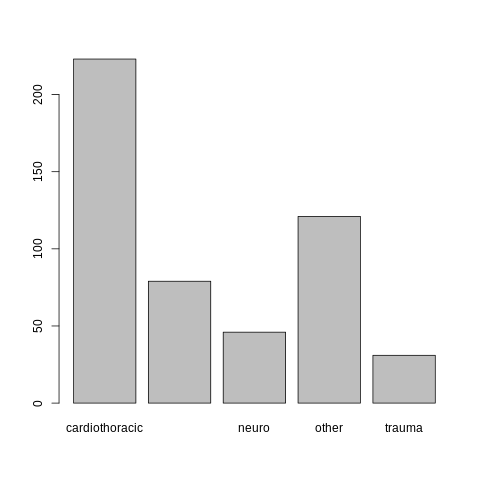

In [ ]:
%%R
barplot(table(ICUData_df$surgery))

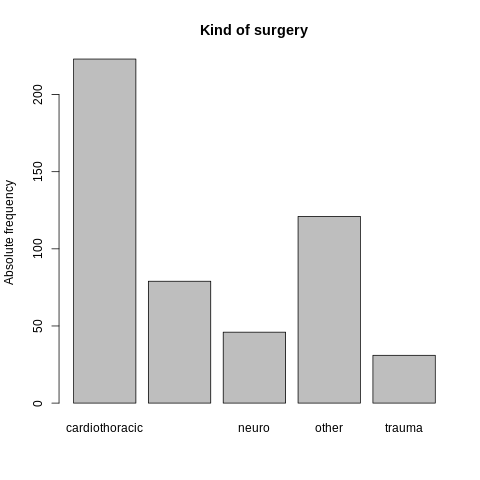

In [ ]:
%%R
barplot(table(ICUData_df$surgery), main = "Kind of surgery",
        ylab = "Absolute frequency")

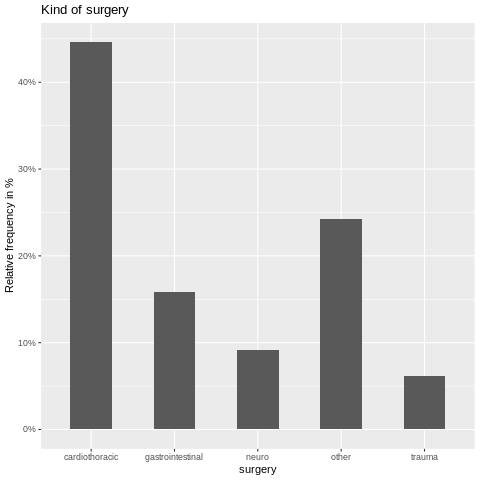

In [ ]:
%%R
# Assign data
ggplot(ICUData_df, aes(x=surgery)) +
  #Add bars with relative frequencies
  geom_bar(aes(y = (..count..)/sum(..count..)), width = 0.5) +
  #The percent of relative frequency
  scale_y_continuous(labels = percent_format(accuracy = 1)) +
  #Title and label of y axis
  ggtitle("Kind of surgery") + ylab("Relative frequency in %")

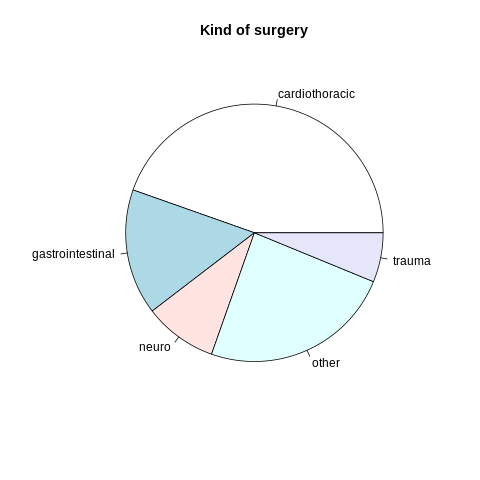

In [ ]:
%%R
pie(table(ICUData_df$surgery), main = "Kind of surgery")

In [ ]:
#Categorical Variables Univariate Analysis
%%R
table(ICUData_df$outcome)


                died                 home       other hospital 
                  69                  170                   72 
secondary care/rehab 
                 189 


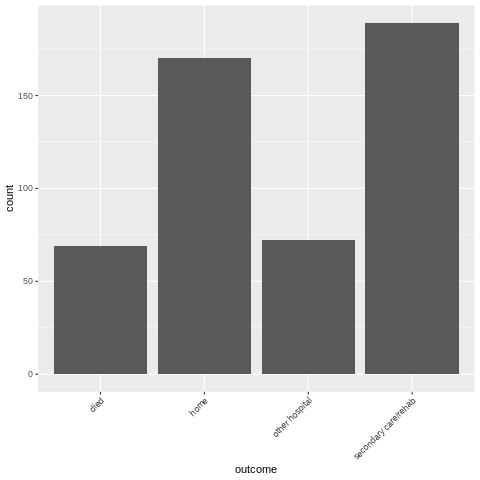

In [ ]:
%%R
ggplot(ICUData_df, aes(x = `outcome`)) +
        geom_bar() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

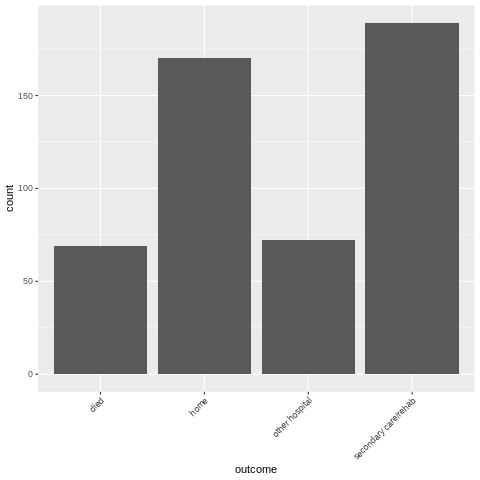

In [ ]:
%%R
ggplot(ICUData_df, aes(x = `outcome`)) +
        geom_bar() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

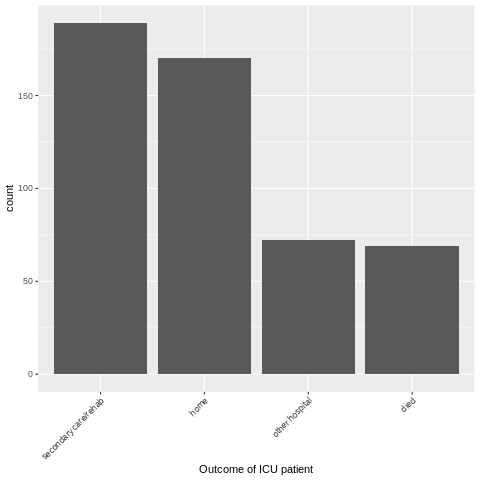

In [ ]:
# re-order levels
%%R
reorder_size <- function(x) {
        factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

ggplot(ICUData_df, aes(x = reorder_size(`outcome`))) +
        geom_bar() +
        xlab("Outcome of ICU patient") +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
%%R
ceiling(c(2.01, 3.88))

[1] 3 4


In [ ]:
## Concatenating numbers to a vector
%%R
x <- c(2, 4, 6, 8, 10, 12, 14, 16, 18, 20)
## Sequence: beginn = 2, end = 20, distance = 2
x <- seq(from = 2, to = 20, by = 2)

In [ ]:
%%R
x
## R default
quantile(x, probs = 0.2)
## Type used by SAS software
quantile(x, type = 3, probs = 0.2)
## Type used by SPSS and Minitab software
quantile(x, type = 6, probs = 0.2)

20% 
4.4 


In [ ]:
%%R
median(ICUData_df$SAPS.II)
## also possible
quantile(ICUData_df$SAPS.II, probs = 0.5)

50% 
 42 


In [ ]:
%%R
IQR(ICUData_df$SAPS.II)

[1] 26


In [ ]:
%%R
mad(ICUData_df$SAPS.II, constant = 1.0)

[1] 13


In [ ]:
%%R
mad(ICUData_df$SAPS.II)

[1] 19.2738


In [ ]:
%%R
sIQR(ICUData_df$SAPS.II)

[1] 19.27383


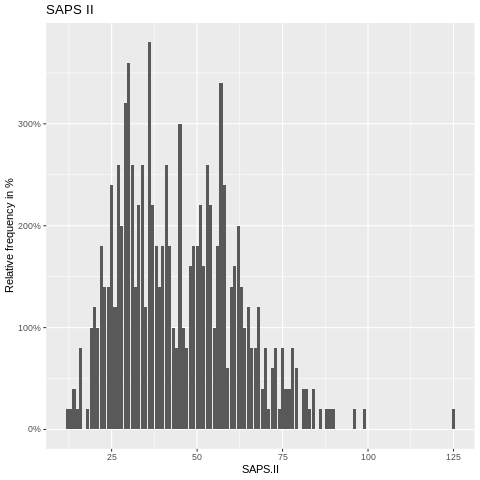

In [ ]:
%%R
ggplot(ICUData_df, aes(x=SAPS.II)) +
  ## Add bars
  geom_bar(aes(y = 100*(..count..)/sum(..count..))) +
  ## Percent of the relative frequency
  scale_y_continuous(labels = percent_format(accuracy = 1)) +
  ## Title and label of y axis
  ggtitle("SAPS II") + ylab("Relative frequency in %")

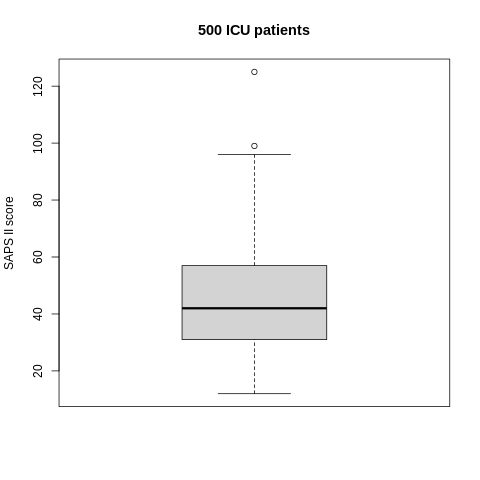

In [ ]:
%%R
boxplot(ICUData_df$SAPS.II, main = "500 ICU patients", ylab = "SAPS II score")

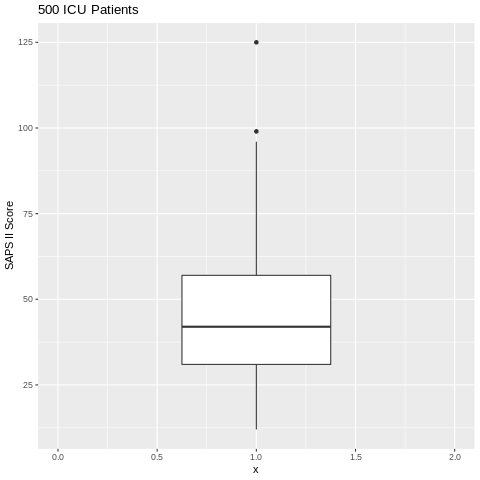

In [ ]:
%%R
ggplot(ICUData_df, aes(x = 1, y = SAPS.II)) +
  geom_boxplot() + xlim(0, 2) + ylab("SAPS II Score") +
  ggtitle("500 ICU Patients")

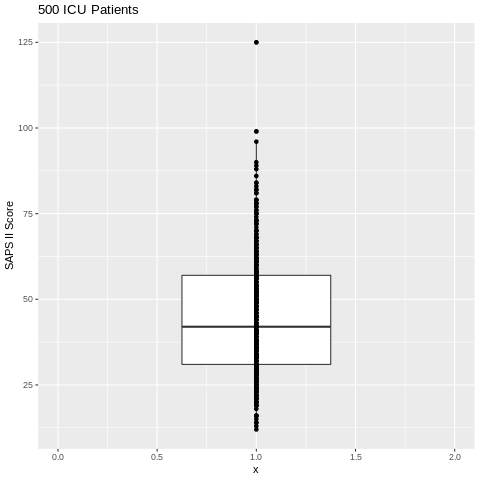

In [ ]:
%%R
ggplot(ICUData_df, aes(x = 1, y = SAPS.II)) +
  geom_boxplot() + xlim(0, 2) + ylab("SAPS II Score") +
  geom_point() + ggtitle("500 ICU Patients")

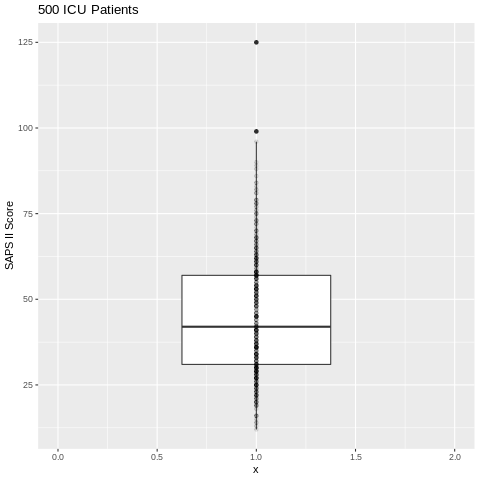

In [ ]:
%%R
ggplot(ICUData_df, aes(x = 1, y = SAPS.II)) +
  geom_boxplot() + xlim(0, 2) + ylab("SAPS II Score") +
  geom_point(alpha = 0.1) + ggtitle("500 ICU Patients")

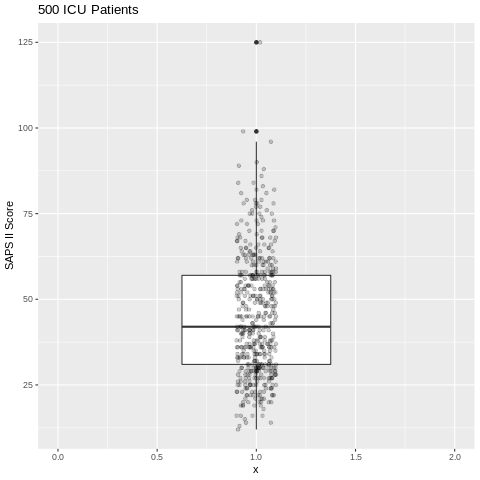

In [ ]:
%%R
ggplot(ICUData_df, aes(x = 1, y = SAPS.II)) +
  geom_boxplot() + xlim(0, 2) + ylab("SAPS II Score") +
  geom_jitter(height = 0, width = 0.1, alpha = 0.2) + 
  ggtitle("500 ICU Patients")

#Metric Variable's Univariate Analysis

In [ ]:
%%R
mean(ICUData$temperature)

[1] 4.880826


In [ ]:
%%R
round(mean(ICUData_df$temperature), 1)

[1] 37.7


In [ ]:
%%R
median(ICUData_df$temperature)

[1] 37.7


In [ ]:
%%R
round(mean(ICUData_df$LOS),1)
median(ICUData_df$LOS)

[1] 1


In [ ]:
%%R
log(Gmean(ICUData_df$bilirubin))

[1] 2.847326


In [ ]:
%%R
mean(log(ICUData_df$bilirubin))

[1] 2.847326


In [ ]:
%%R
exp(mean(log(ICUData_df$bilirubin)))

[1] 17.24162


In [ ]:
%%R
var(ICUData_df$temperature)
sd(ICUData_df$temperature)

[1] 1.735474


In [ ]:
%%R
n <- nrow(ICUData_df)
(n-1)/n*var(ICUData_df$temperature)
(n-1)/n*sd(ICUData_df$temperature)

[1] 1.732003


In [ ]:
%%R
sd(ICUData_df$temperature)
mad(ICUData_df$temperature)
sIQR(ICUData_df$temperature)

[1] 1.111952


In [ ]:
%%R
CV(ICUData_df$temperature)
medCV(ICUData_df$temperature)
iqrCV(ICUData_df$temperature)

[1] 0.02949474


In [ ]:
%%R
log(Gsd(ICUData_df$bilirubin))
sd(log(ICUData_df$bilirubin))

[1] 0.7238379


In [ ]:
%%R
Skew(ICUData_df$temperature[-398])

[1] 0.3142909


In [ ]:
%%R
Kurt(ICUData_df$temperature)
Kurt(ICUData_df$temperature[-398])

[1] 0.3431707


In [ ]:
%%R
Kurt(ICUData_df$LOS)

[1] 33.59482


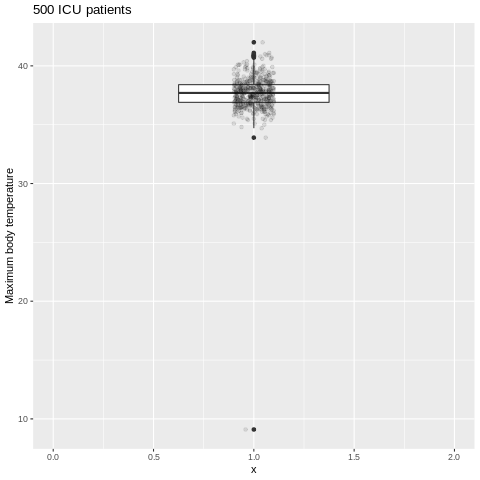

In [ ]:
## Box-and-whisker plot at position x = 1
%%R
ggplot(ICUData_df, aes(x = 1, y = temperature)) +
  geom_boxplot() + xlim(0, 2) + ylab("Maximum body temperature") +
  geom_jitter(height = 0, width = 0.1, alpha = 0.1) + 
  ggtitle("500 ICU patients")

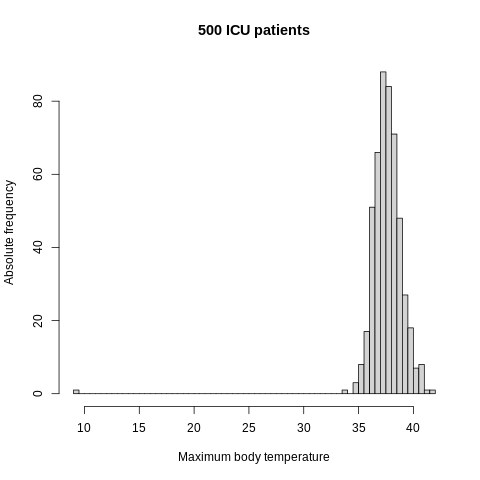

In [ ]:
%%R
hist(ICUData_df$temperature, breaks = seq(from = 9.0, to = 42, by = 0.5),
     main = "500 ICU patients", xlab = "Maximum body temperature",
     ylab = "Absolute frequency")

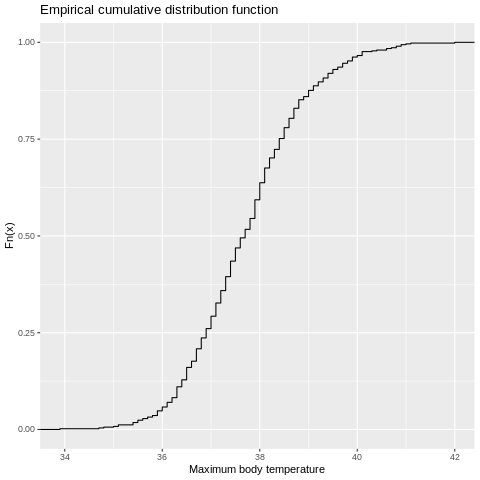

In [ ]:
%%R
ggplot(ICUData_df[-398,], aes(x = temperature)) + stat_ecdf() + 
  xlab("Maximum body temperature") + ylab("Fn(x)") + 
  ggtitle("Empirical cumulative distribution function")

In [ ]:
%%R
install.packages(c("distr", "distr6"))

In [ ]:
library(distr)
library(distr6)

In [ ]:
%%R
X=ICUData_df$heart.rate
#print(length(X))
T=table(X) # frequency table
phat= T[2]/length(X) # estimation of p
p=phat

sim_data=rbinom(1000,1,p)
 sim_data

   [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0

#Wald test Hypothesis testing:

Wald test statistic was used to do hypothesis testing

H0 : There is no difference in mean heart rate  of  died  and home patient in ICU

H1 : Mean heart rate of the 2 patient of ICU's are different

The W statistic is 0.05574695

The p value is 0.9555434

At α=0.05, this implies that we have enough evidence not to reject the null that there is no difference in mean heart rate of two type of ICU Patient

In [ ]:
%%R
died=ICUData_df$heart.rate[ICUData_df$outcome=="died"]    
home=ICUData_df$heart.ratee[ICUData_df$outcome=="home"]
n.died=length(died)
n.died

[1] 69


In [ ]:
%%R
mu.died=mean(died)
sigma.died<-sd(died)
n.home=length(home)
n.home

[1] 0


In [ ]:
%%R
mu.home=mean(home)
sigma.home<-sd(home)
mu_hat=mu.died-mu.home
mu_hat

[1] NA


#The Shapiro-Wilk statistical hypothesis test

In [ ]:
%%R
shapiro.test(ICUData_df$heart.rate)


	Shapiro-Wilk normality test

data:  ICUData_df$heart.rate
W = 0.97873, p-value = 1.123e-06



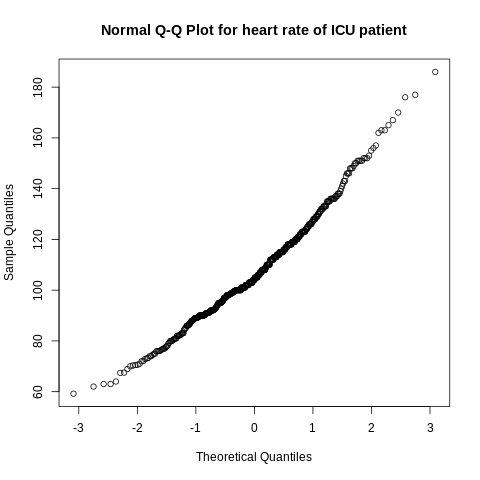

In [ ]:
%%R
qqnorm(ICUData_df$`heart.rate`, main = "Normal Q-Q Plot for heart rate of ICU patient")

#Anova Hypothesis test

In [ ]:
%%R
#One way Anova test
one.way <- aov(age ~ heart.rate, data = ICUData_df)

summary(one.way)

             Df Sum Sq Mean Sq F value Pr(>F)
heart.rate    1     44   44.07   0.202  0.653
Residuals   498 108764  218.40               


In [ ]:
%%R
#Two way Anova test
two.way <- aov(age ~ heart.rate + temperature, data = ICUData_df)

summary(two.way)

             Df Sum Sq Mean Sq F value Pr(>F)  
heart.rate    1     44    44.1   0.202 0.6529  
temperature   1    601   600.5   2.759 0.0973 .
Residuals   497 108164   217.6                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Binomial Distribution

In [ ]:
#Binomial distribution
%%R
X=ICUData_df$heart.rate
T=table(X)
T
pmf=dbinom(T,10,0.3) # pmf
cdf=pbinom(T,10,0.3)  # cdf
df=data.frame(T,pmf,cdf)
head(df)

     X Freq  X.1    Freq.1  X.2    Freq.2
1 59.2    1 59.2 0.1210608 59.2 0.1493083
2   62    1   62 0.1210608   62 0.1493083
3   63    2   63 0.2334744   63 0.3827828
4   64    1   64 0.1210608   64 0.1493083
5 67.4    1 67.4 0.1210608 67.4 0.1493083
6 67.5    1 67.5 0.1210608 67.5 0.1493083


In [ ]:
%%R
ICY_d <- head(ICUData_df[ICUData_df$heart.rate == 98.0, ], n = 1)

In [ ]:
%%R
for (i in 99:110){
  ICY_d <- rbind(ICY_d, head(ICUData_df[ICUData_df$heart.rate == i, ], n = 1))
}

In [ ]:
# Calculating the average for variable heart rate
%%R
heart_avg <- mean(ICUData_df$heart.rate)
heart_avg

[1] 107.4144


In [ ]:
# Calculating the standard deviation for variabl heart rate
%%R
heart_ssd <- sd(ICUData_df$heart.rate)
heart_ssd


[1] 20.85798


# Normal Distribution

In [ ]:
%%R
#Normal Probability distribution
pnorm(104, heart_avg, heart_ssd)

[1] 0.4349846


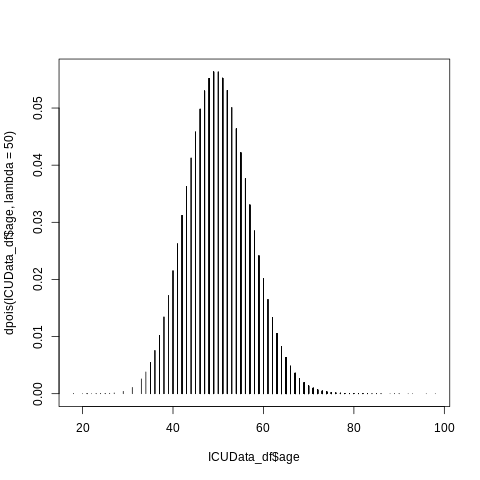

In [ ]:
%%R
#create plot of probability mass function
plot(ICUData_df$age, dpois(ICUData_df$age, lambda=50), type='h')

# Poisson Distribution

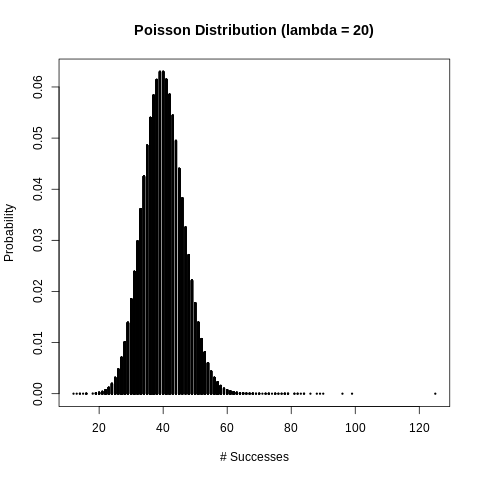

In [ ]:
%%R
plot(ICUData_df$SAPS.II
, dpois(ICUData_df$SAPS.II
, lambda=40),
     type='h',
     main='Poisson Distribution (lambda = 20)',
     ylab='Probability',
     xlab ='# Successes',
     lwd=3)